In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# deaths_by_state = pd.DataFrame
state_reader = pd.read_csv('Underlying Cause of Death, 2007-2018.txt', delimiter='\t')
state_reader.head(50)
state_reader['avg pop'] = state_reader['Population']/11
state_reader

,Notes,ICD-10 113 Cause List,ICD-10 113 Cause List Code,State,State Abr,State Code,Deaths,Population,Crude Rate,avg pop
0,NaN,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,Alabama,AL,1.0,50,57721479.0,0.1,5.247407e+06
1,NaN,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,Alaska,AK,2.0,12,8660471.0,Unreliable,7.873155e+05
2,NaN,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,Arizona,AZ,4.0,70,79524134.0,0.1,7.229467e+06
3,NaN,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,Arkansas,AR,5.0,58,35333373.0,0.2,3.212125e+06
4,NaN,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,California,CA,6.0,176,457426729.0,0,4.158425e+07
...,...,...,...,...,...,...,...,...,...,...
126,"compared to previous practice. In addition, da...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,in information available to individual states ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,information can be found at: https://www.cdc.g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,10. Changes to cause of death classification a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
total_by_state = state_reader[['State Abr', 'Deaths']]
total_by_state = total_by_state.head(51)
total_by_state = total_by_state.drop([8])
# total_by_state = total_by_state[total_by_state['Deaths'] != 'Suppressed']
total_by_state = total_by_state.replace({'Suppressed': '0'})
total_by_state['Deaths'] = total_by_state['Deaths'].astype(str).astype(int)
total_by_state = total_by_state.sort_values('Deaths', ascending=False).reset_index(drop=True)
total_by_state.index = total_by_state.index + 1
total_by_state.index.name = 'rank'
total_by_state = total_by_state.rename(columns={'State Abr': 'state','Deaths': 'deaths'})
total_by_state

,state,deaths
rank,,
1,TX,305
2,CA,176
3,FL,147
4,NC,109
5,TN,98
6,GA,91
7,OH,85
8,MI,84
9,PA,79


In [7]:
top_five = total_by_state.head(5)
top_five

,state,deaths
rank,,
1,TX,305
2,CA,176
3,FL,147
4,NC,109
5,TN,98


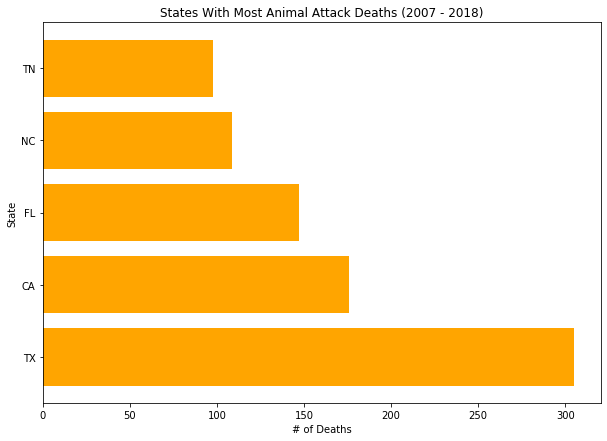

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.barh(top_five['state'],top_five['deaths'], color='orange')
plt.xlabel('# of Deaths')
plt.ylabel("State")
plt.title('States With Most Animal Attack Deaths (2007 - 2018)')
plt.savefig('images/animal_attack_deaths.png', bbox_inches='tight')

In [9]:
connection_string = "postgres:root@localhost:5432/animal_attacks_db"
engine = create_engine(f'postgresql://{connection_string}')

/Users/daniellamayoral/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [10]:
engine.table_names()

/Users/daniellamayoral/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


OperationalError: (psycopg2.OperationalError) FATAL:  password authentication failed for user "postgres"

(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [11]:
total_by_state.to_sql(name='deaths_by_state', con=engine, if_exists='append', index=True)

OperationalError: (psycopg2.OperationalError) FATAL:  password authentication failed for user "postgres"

(Background on this error at: https://sqlalche.me/e/14/e3q8)

Citation: Centers for Disease Control and Prevention, National Center for Health Statistics. Underlying Cause of Death"
"1999-2019 on CDC WONDER Online Database, released in 2020. Data are from the Multiple Cause of Death Files, 1999-2019, as"
"compiled from data provided by the 57 vital statistics jurisdictions through the Vital Statistics Cooperative Program. Accessed"
"at http://wonder.cdc.gov/ucd-icd10.html on Sep 18, 2021 2:21:47 PM"